In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
# import seaborn as sns
# import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image
from sklearn.linear_model import LinearRegression
import numpy as np
# from sklearn import linear_model
# from sklearn.linear_model import LassoCV
# import re
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\src")
from processing_functions import *
from plot_functions import *
from capstone_modelling import *
from model_eval_plot import *

In [2]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)
df_fw.head()

Dataframe shape:  (52, 15)
Dataframe shape:  (52, 15)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV
0,22,77.8,175.0,39.0,78,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26
1,21,71.6,179.0,24.0,48,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27
2,19,60.8,165.0,26.0,52,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26
3,21,58.4,172.0,20.0,40,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26
4,20,82.3,185.0,30.0,60,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29


# Feature engineering

In [3]:
loads = [20, 40, 60, 80, 90]
unique_load_pairs = create_pairs(loads)
unique_load_pairs.append([40, 60, 80])
unique_load_pairs.append([40, 60, 80, 90])
unique_load_pairs

Number of unique pairs: 10


[[20, 40],
 [20, 60],
 [20, 80],
 [20, 90],
 [40, 60],
 [40, 80],
 [40, 90],
 [60, 80],
 [60, 90],
 [80, 90],
 [40, 60, 80],
 [40, 60, 80, 90]]

In [4]:
model_names = []
for load_pair in unique_load_pairs:
    name = 'LV '+'-'.join([str(item) for item in load_pair])
    model_names.append(name)
model_names

['LV 20-40',
 'LV 20-60',
 'LV 20-80',
 'LV 20-90',
 'LV 40-60',
 'LV 40-80',
 'LV 40-90',
 'LV 60-80',
 'LV 60-90',
 'LV 80-90',
 'LV 40-60-80',
 'LV 40-60-80-90']

In [5]:
# Create dataframes with engineered features: FW
df_fw_dict = dict()
for index, model in enumerate(model_names):
    df_fw_dict[model] = individual_regression2(df_fw, unique_load_pairs[index])

df_fw_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

In [6]:
# Create dataframes with engineered features: SM
df_sm_dict = dict()
for index, model in enumerate(model_names):
    df_sm_dict[model] = individual_regression2(df_sm, unique_load_pairs[index])
df_sm_dict.keys()

Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


dict_keys(['LV 20-40', 'LV 20-60', 'LV 20-80', 'LV 20-90', 'LV 40-60', 'LV 40-80', 'LV 40-90', 'LV 60-80', 'LV 60-90', 'LV 80-90', 'LV 40-60-80', 'LV 40-60-80-90'])

In [16]:
df_fw_dict['LV 40-60-80-90'].head(3)

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-184.917733,250.021938,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-116.018416,152.641372,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-116.046002,162.019441,0.275192


# Free weight: Linear regression


LV 20-40 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			13.55		55.76		-42.21
MAE: 			9.97		40.13		-30.15
mean error: 		0.00		34.81		-34.81
R^2: 			0.74		-3.33		4.07
Pearson r statistic: 	0.86		0.70		0.16
			p=0.00		p=0.00

predictions mean: 	136.28		171.09		-34.81
predictions std: 	23.13		58.45		-35.32

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 1.4572574180753088
	LV intercept: 1.6057812090308095
	model intercept:  47.67430442274886

LV 20-60 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			9.19		22.65		-13.46
MAE: 			6.82		16.96		-10.14
mean error: 		0.00		15.73		-15.73
R^2: 			0.88		0.29		0.60
Pearson r statistic: 	0.94		0.90		0.04
			p=0.00		p=0.00

predictions mean: 	136.28		152.01		-15.73
predictions std: 	25.18		35.59		-10.41

target mean: 136.28
target std: 27.07

Model feature coefficients
	LV slope: 1.1425061876977423
	LV intercept: 1.5131076856096857
	model intercept:  21.08493842477739

LV 20-80 

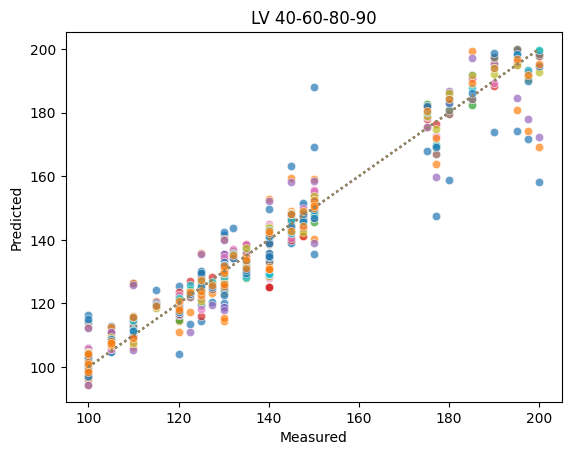

In [7]:
# linear regression on free weight data
predictions, metrics, model_dict = batch_model(model_names, df_fw_dict)

In [18]:
metrics

,LV 20-40,LV 20-60,LV 20-80,LV 20-90,LV 40-60,LV 40-80,LV 40-90,LV 60-80,LV 60-90,LV 80-90,LV 40-60-80,LV 40-60-80-90
mae,10.8950,7.4328,3.3470,3.6524,7.0404,3.0367,3.5909,3.1772,3.4033,3.0681,3.4463,3.0105
r2,0.5862,0.8249,0.9690,0.9413,0.8463,0.9733,0.9538,0.9726,0.9567,0.9647,0.9700,0.9703
t statistic,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000
ttest pvalue,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
Cohens d,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
LV slope,1.4573,1.1425,0.6854,0.4016,1.1366,0.7261,0.6652,0.6498,0.5898,0.5347,0.6757,0.6380
LV intercept,1.6058,1.5131,1.2708,1.0250,1.5124,1.2984,1.2277,1.2420,1.1791,1.1487,1.2618,1.2245
model intercept,47.6743,21.0849,4.5165,9.3421,19.9359,4.7929,9.2577,4.3250,7.1115,5.6229,3.9407,5.8294


## Plot results

Metrics dataframe shape (free weight data): (624, 3)


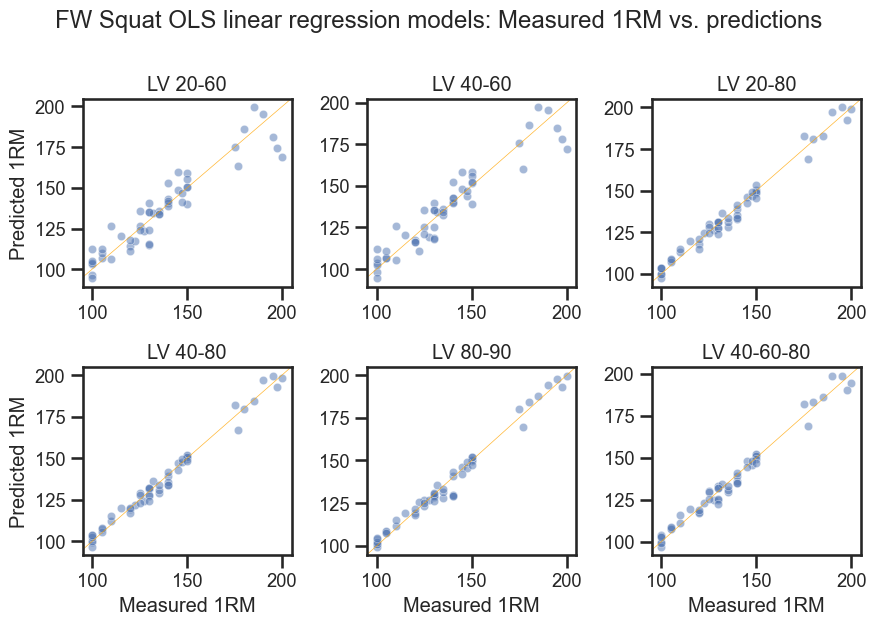

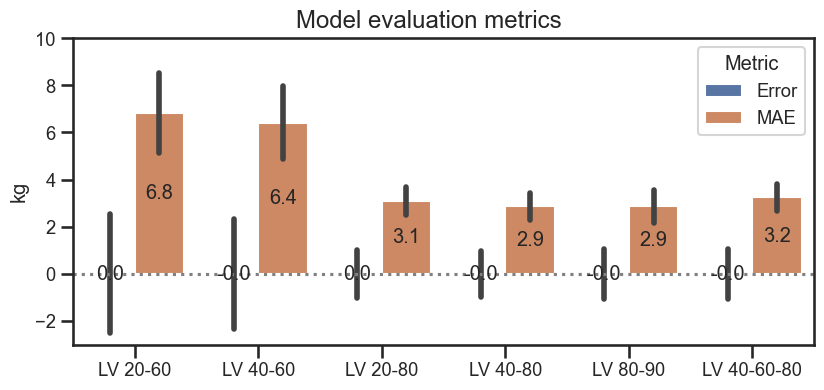

In [11]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
iter2_scatterplot, iter2_error_plot, metrics = compare_models2(predictions[selected_models], 
    title='FW Squat OLS linear regression models: Measured 1RM vs. predictions', context='talk', ymin=-3)
    # plot_functions.py

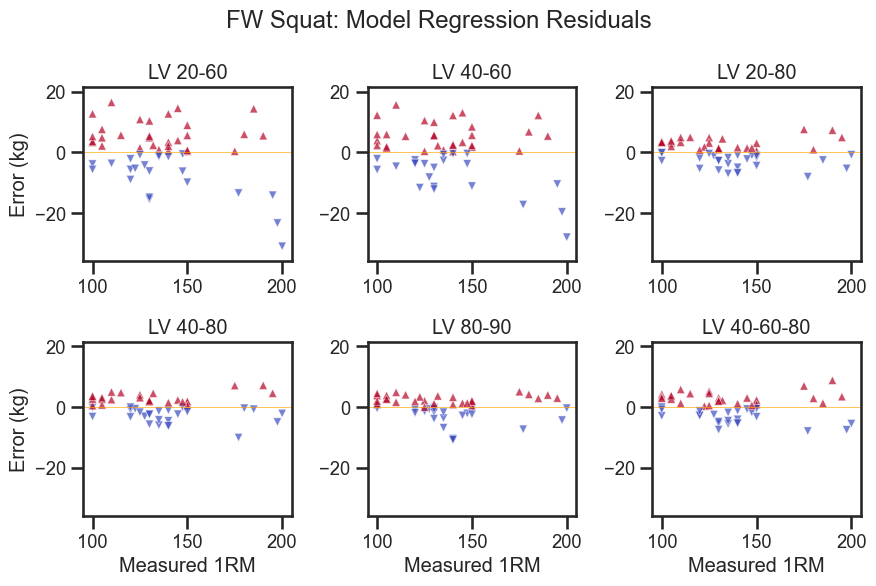

In [9]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
residual_plot2 = plot_residuals2(predictions[selected_models], 
    title='FW Squat', context='talk') # model_eval_plot.py

In [ ]:
cv_mae_fw, cv_r2_fw = batch_run_cv(model_names, df_fw_dict, LinearRegression()) # capstone_modelling.py
path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics'
save_csv(cv_mae_fw, '02b iteration CV MAE fw', path)
# sns.reset_defaults()    
    # sns.set_theme(context=context, style='ticks')
    # %matplotlib inlinesave_csv(cv_mae_fw, '02b iteration CV r2 fw', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/02b iteration CV MAE fw.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


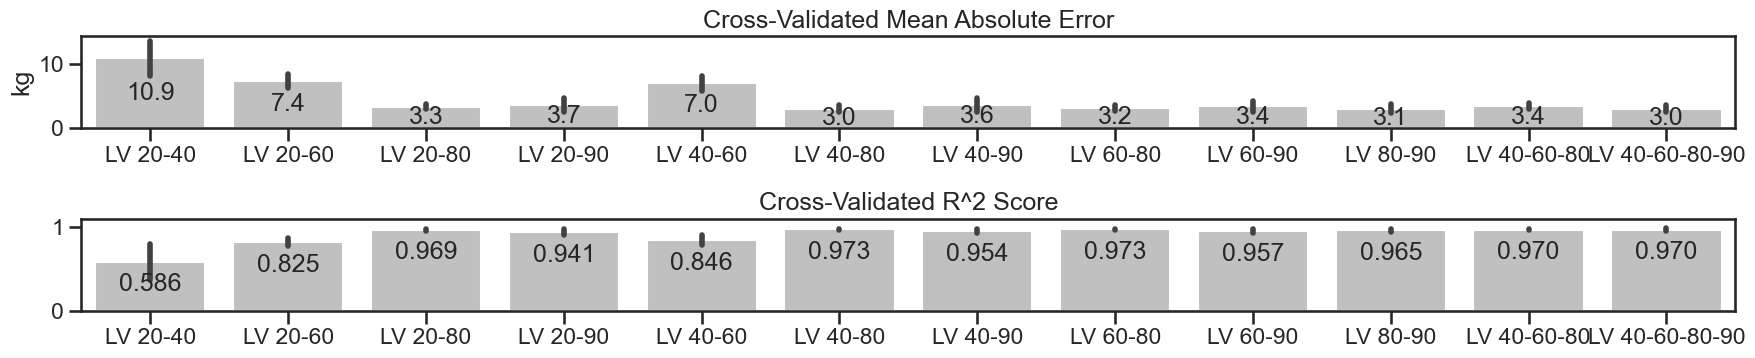

In [ ]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline

plot_cv_metrics(cv_mae_fw, cv_r2_fw).savefig(
    '../output/figures/02b iteration CV metrics ALL MODELS.png')

# Free weight: Random Forest

## Default hyperparameters

In [20]:
predictions_rf, metrics_rf, model_dict_rf = batch_model(model_names, 
    df_fw_dict, estimator=RandomForestRegressor(random_state=0), pickle_name=None)

In [171]:
save_csv(metrics_rf, 'RandomForest_FW_metrics_and_coefficients', r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models\randomforestregressor')
save_csv(predictions_rf, 'RandomForest_FW_predictions', r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions\randomforestregressor')
savepickle(model_dict_rf, 'RandomForest_models_dictionary', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models\randomforestregressor')

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/randomforestregressor/RandomForest_FW_metrics_and_coefficients.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/predictions/randomforestregressor/RandomForest_FW_predictions.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/randomforestregressor/RandomForest_models_dictionary.sav


### Explore model attributes

In [32]:
model_dict_rf['LV 20-90'].get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [35]:
model_dict_rf['LV 20-90'].decision_path(df_fw_dict['LV 20-90'][['slope', 'intercept']])

(<52x4522 sparse matrix of type '<class 'numpy.int64'>'
 	with 32331 stored elements in Compressed Sparse Row format>,
 array([   0,   49,  102,  155,  200,  251,  294,  337,  386,  435,  470,
         509,  558,  607,  656,  703,  752,  797,  840,  881,  918,  967,
        1014, 1065, 1112, 1159, 1196, 1239, 1280, 1321, 1360, 1411, 1452,
        1497, 1540, 1587, 1632, 1677, 1726, 1763, 1802, 1849, 1898, 1941,
        1986, 2027, 2070, 2121, 2170, 2213, 2256, 2297, 2342, 2377, 2428,
        2471, 2512, 2567, 2606, 2653, 2692, 2741, 2786, 2837, 2880, 2923,
        2966, 3021, 3060, 3113, 3168, 3217, 3260, 3307, 3356, 3389, 3442,
        3479, 3524, 3561, 3610, 3663, 3704, 3745, 3788, 3837, 3886, 3929,
        3966, 4009, 4054, 4105, 4152, 4201, 4242, 4289, 4336, 4387, 4430,
        4471, 4522]))

### Plot model results

Metrics dataframe shape (free weight data): (624, 3)


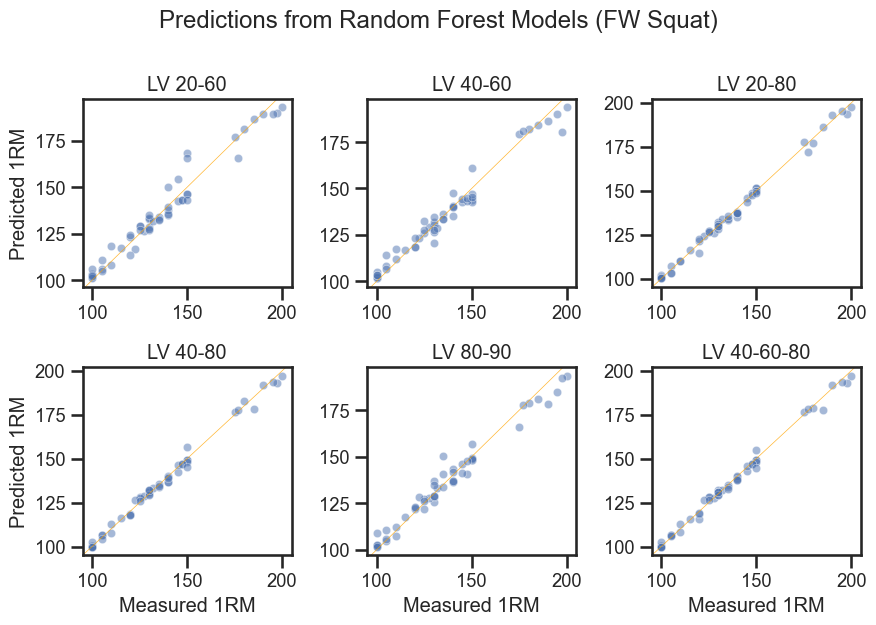

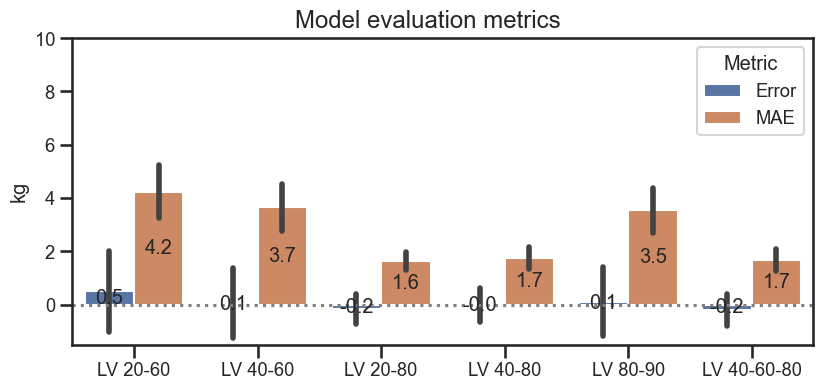

In [134]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
scatterplot, error_plot, metrics = compare_models2(predictions_rf[selected_models],
    title='Predictions from Random Forest Models (FW Squat)', context='talk')

In [21]:
from sklearn.ensemble import RandomForestRegressor

cv_mae_rf = pd.DataFrame()
cv_r2_rf = pd.DataFrame()
cv_mae_rf, cv_r2_rf = batch_run_cv(model_names, df_fw_dict, RandomForestRegressor(random_state=0))
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics\random forest cv metrics'
save_csv(cv_mae_rf, 'cv_mae_randomforest_fw', path)
save_csv(cv_r2_rf, 'cv_r2_randomforest_fw', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/cv_mae_randomforest_fw.csv.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/cv_r2_randomforest_fw.csv.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


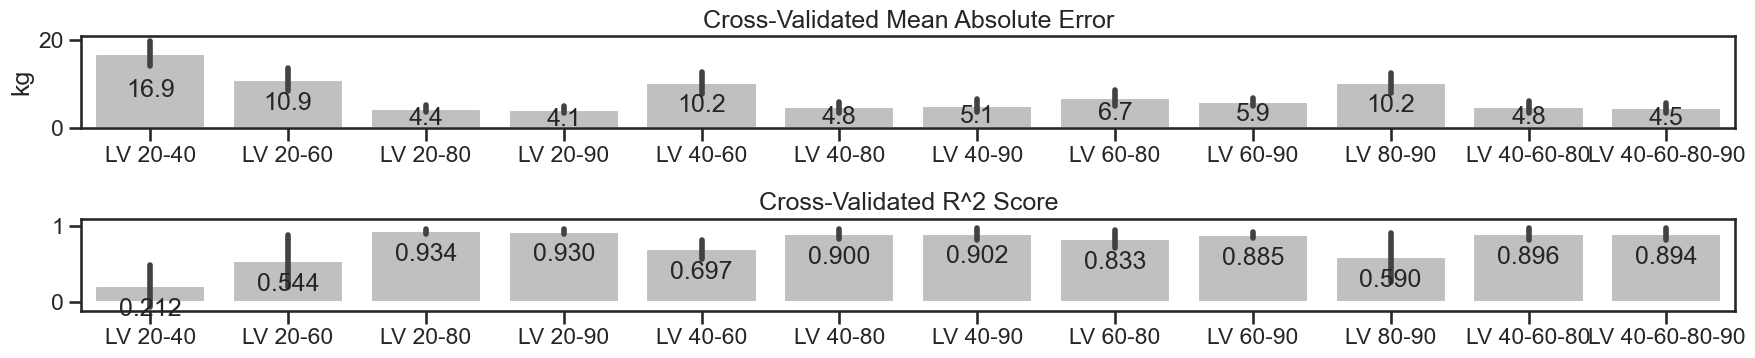

In [26]:
plot_cv_metrics(cv_mae_rf, cv_r2_rf).savefig(
    '../output/figures/randomforest/randomforest CV metrics ALL MODELS.png')
# Unlike with Linear Regression models, the provide
# best predictions are when the LV slope is determined using a larger range between the lowest
# and highest loads

In [14]:
predictions_rf = load_csv('RandomForest_FW_predictions.csv', column1_as_index=True,
    filepath=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\predictions\randomforestregressor')

Dataframe shape:  (52, 13)


Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures\randomforest/RandomForest_residualsFW_.png_residuals_plot_Random Forest.png


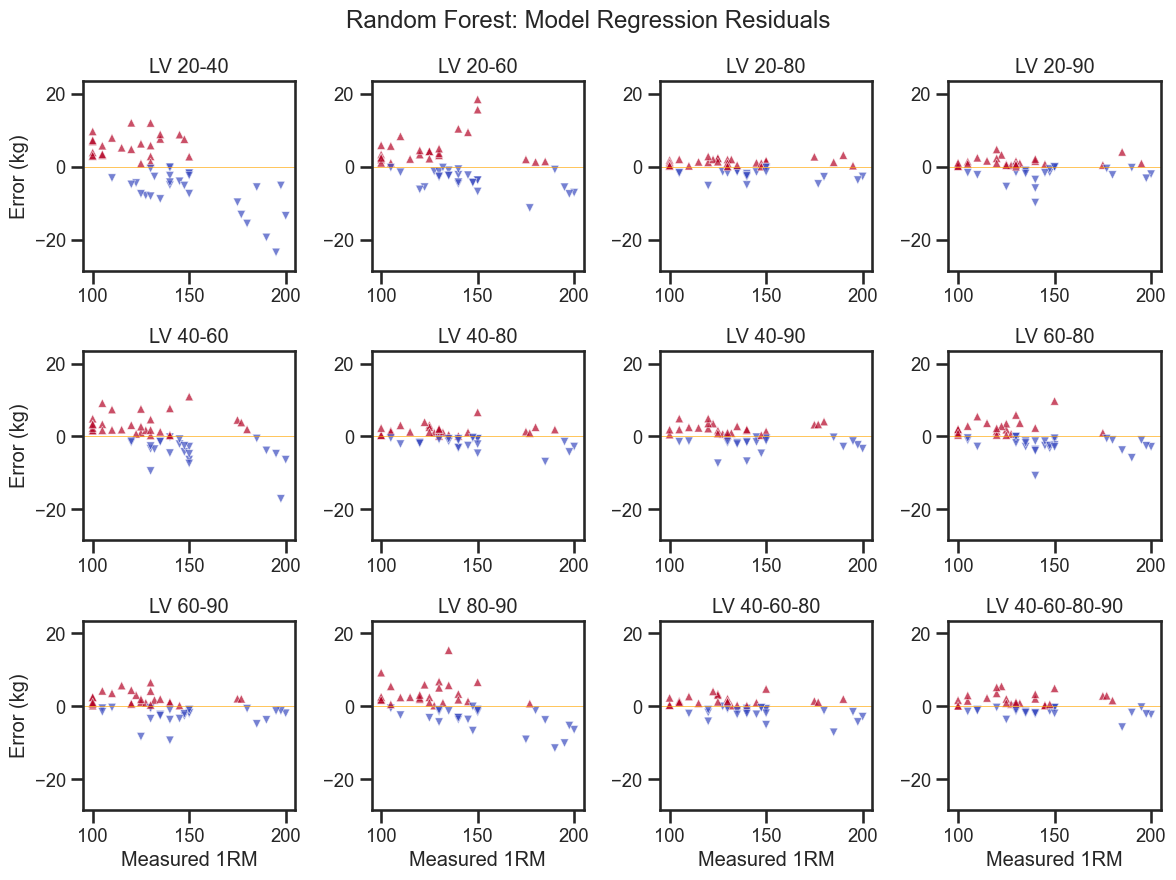

In [19]:
residual_plot_rf = plot_residuals2(predictions_rf, title='Random Forest', context='talk', 
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures\randomforest',
    pickle_name='RandomForest_residualsFW_.png')

## Hyperparameter tuning

In [ ]:
df = df_fw_dict['LV 40-60-80']
df.head()

,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-197.674419,260.302326,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-113.941221,150.999246,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-124.824356,169.121780,0.275192
3,21.0,58.4,172.0,20.0,40.0,60.0,80.0,90.0,100.0,0.97,0.85,0.68,0.50,0.38,0.26,-114.254625,137.312296,0.275192
4,20.0,82.3,185.0,30.0,60.0,90.0,120.0,135.0,150.0,1.02,0.92,0.76,0.50,0.40,0.29,-140.207715,191.884273,0.275192


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': np.arange(5, 30, 5),
    'max_depth': np.arange(2,8,1)
}

def run_gridsearch(param_grid, df=df, x_columns=['slope', 'intercept']):
    X = df[x_columns]
    y = df['Load-1RM-1']
    estimator = RandomForestRegressor(random_state=0, criterion='absolute_error')
    gs = GridSearchCV(estimator, param_grid=param_grid, cv=10)
    gs.fit(X, y)
    print(f'Best hyperparameters: {gs.best_params_}')
    try:
        mae, r2 = cv_mae_r2(df, gs.best_estimator_, x_columns=x_columns)
        print(f'Mean absolute error: {np.mean(mae)}')
        print(f'R^2: {np.mean(r2)}')
    except:
        print('unable to score')
    return gs

gs = run_gridsearch(param_grid, df=df)

Best hyperparameters: {'max_depth': 7, 'n_estimators': 20}
Mean absolute error: 4.8545833333333315
R^2: 0.8912692365375655


In [ ]:
df = df_fw_dict['LV 20-90']
gs2 = run_gridsearch(param_grid, df=df)

Best hyperparameters: {'max_depth': 6, 'n_estimators': 25}
Mean absolute error: 4.152466666666667
R^2: 0.9286873307874002


In [ ]:
# Even with hyperparameter tuning, RandomForest models did not perform as well as 
# LinearRegression models

### Cross validate for all combinations of loads

In [ ]:
cv_mae_rf, cv_r2_rf = batch_run_cv(model_names, df_fw_dict, gs.best_estimator_)
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics\random forest cv metrics'
save_csv(cv_mae_rf, '05_iteration_cv_mae_rf', path)
save_csv(cv_r2_rf, '05_iteration_cv_r2_rf', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/05_iteration_cv_mae_rf.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/random forest cv metrics/05_iteration_cv_r2_rf.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


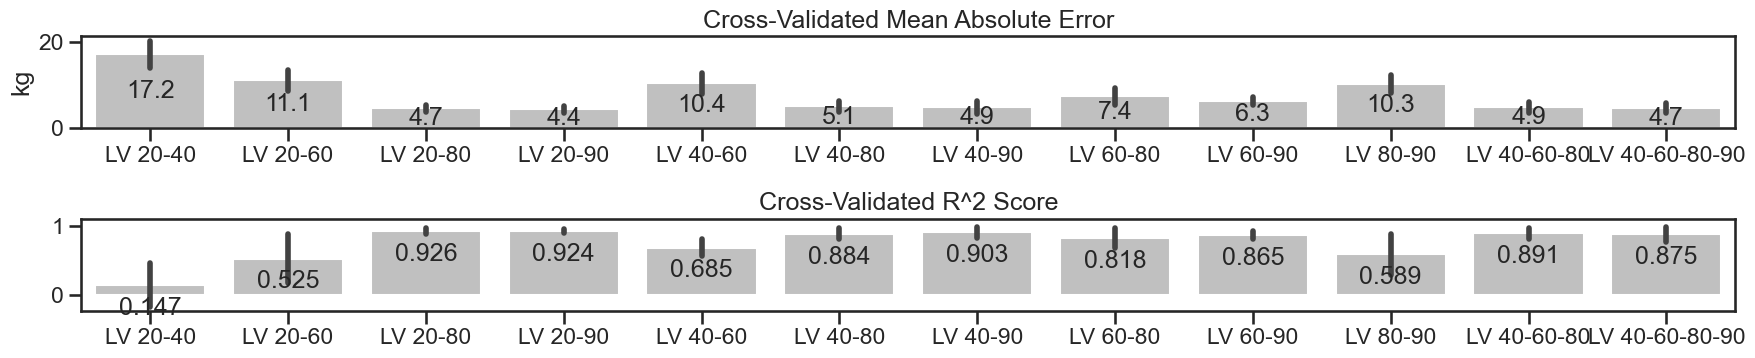

In [ ]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline
filename = '05 iteration CV metrics RandomForest maxdepth_7 n_estimators20.png'
plot_cv_metrics(cv_mae_rf, cv_r2_rf).savefig(
'../output/figures/randomforest/'+filename)

In [ ]:
savepickle(gs, '05 iteration GridSearchCV result', path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\pickled models\randomforestregressor')

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/pickled models/randomforestregressor/05 iteration GridSearchCV result.sav


# Smith machine data: Linear regression


LV 20-40 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			21.28		55.53		-34.24
MAE: 			16.89		40.52		-23.63
mean error: 		-0.00		36.63		-36.63
R^2: 			0.51		-2.33		2.84
Pearson r statistic: 	0.71		0.62		0.10
			p=0.00		p=0.00

predictions mean: 	164.22		200.85		-36.63
predictions std: 	21.75		53.58		-31.83

target mean: 164.22
target std: 30.73

Model feature coefficients
	LV slope: 1.3836519515656456
	LV intercept: 1.5348308570563958
	model intercept:  60.15251159873682
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/models/05 iteration SM LV 20-40.sav

LV 20-60 evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			12.54		22.00		-9.45
MAE: 			10.05		17.09		-7.04
mean error: 		-0.00		14.78		-14.78
R^2: 			0.83		0.48		0.35
Pearson r statistic: 	0.91		0.89		0.02
			p=0.00		p=0.00

predictions mean: 	164.22		179.00		-14.78
predictions std: 	27.72		36.14		-8.42

target mean: 164.22
target std: 30.73

Model fe

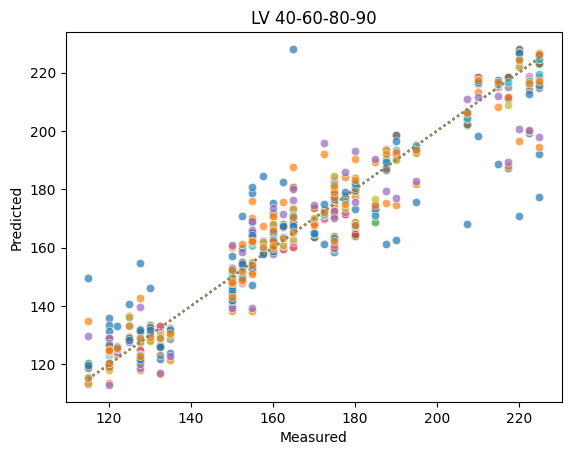

In [ ]:
# linear regression on Smith machine data
predictions_sm, metrics_sm, model_dict_sm = batch_model(model_names, df_sm_dict, pickle_name='05 iteration SM')

Metrics dataframe shape (free weight data): (624, 3)


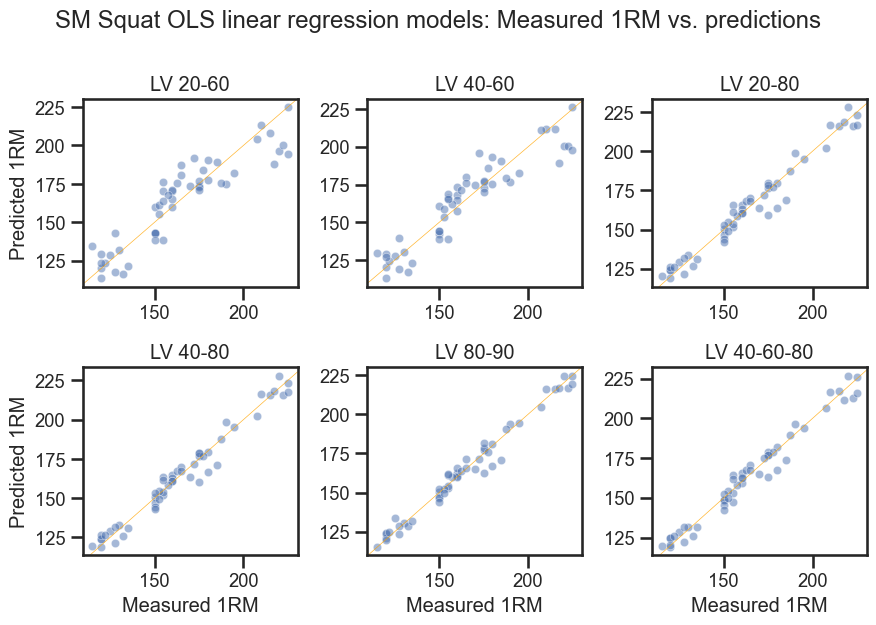

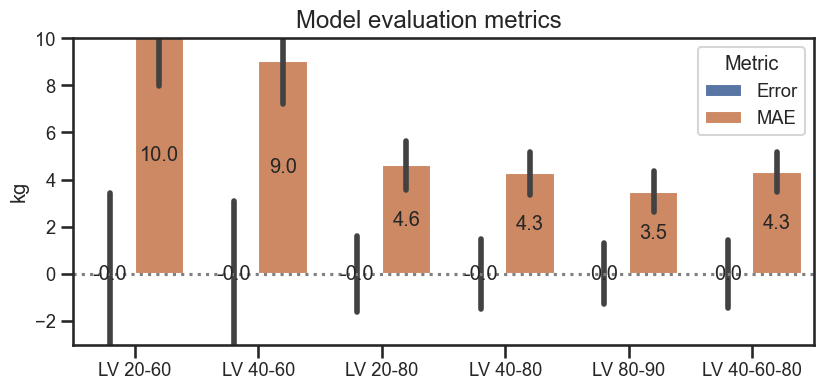

In [ ]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
sm_scatterplot, sm_error_plot, metrics = compare_models2(predictions_sm[selected_models], 
    title='SM Squat OLS linear regression models: Measured 1RM vs. predictions', context='talk', ymin=-3)

sm_scatterplot.savefig('../output/figures/05 iteration SM measured vs predicted for all samples SELECT MODELS.png')

Metrics dataframe shape (free weight data): (624, 3)
Figure saved: C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\figures/05_iteration_SM_residuals_plot_SM Squat.png


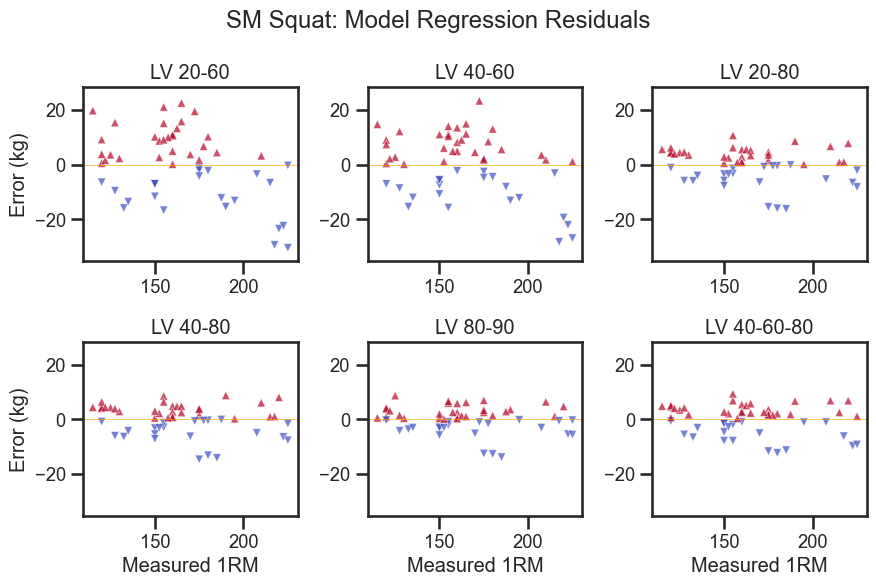

In [ ]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
residual_plot2_sm = plot_residuals2(predictions_sm[selected_models], 
    title='SM Squat', context='talk', pickle_name='05_iteration_SM')

## Evaluate 

In [ ]:
cv_mae_sm, cv_r2_sm = batch_run_cv(model_names, df_sm_dict, LinearRegression())
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\model metrics'
save_csv(cv_mae_sm, '05_iteration_cv_mae_sm', path)
save_csv(cv_r2_sm, '05_iteration_cv_r2_sm', path)

File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/05_iteration_cv_mae_sm.csv
File saved:  C:/Users/silvh/OneDrive/lighthouse/projects/lighthouse-capstone-project/output/model metrics/05_iteration_cv_r2_sm.csv


C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
C:\Users\silvh\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


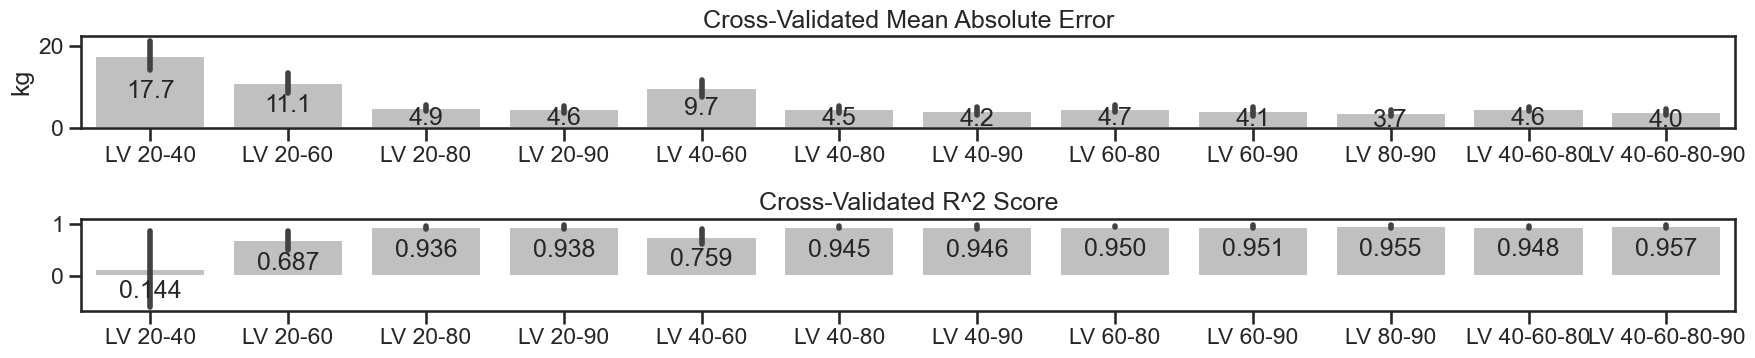

In [ ]:
sns.reset_defaults()    
sns.set_theme(context='talk', style='ticks')
%matplotlib inline
plot_cv_metrics(cv_mae_sm, cv_r2_sm).savefig(
'../output/figures/05_iteration_CV_metrics_SM_ALL_MODELS.png.png')

# *End of Page*